In [ ]:
import scanpy as sc
import anndata as ad
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reproducibility
np.random.seed(42)

In [3]:
def plot_qc_metrics(data):

    sns.histplot(data.obs["n_genes_by_counts"].unique(), bins=100)
    plt.title("Unique transcripts per cell")

    plt.tight_layout()
    plt.show()
    
    sc.pl.violin(data, ['n_genes_by_counts','total_counts'], multi_panel=True, show=False)
    plt.gcf().axes[0].set_title('Number of Genes by Counts')
    plt.gcf().axes[1].set_title('Total transcripts per cell')

    plt.tight_layout()
    plt.show()

In [ ]:
os.makedirs("../1_preprocessing", exist_ok=True)

Number of cells: 7015
Number of genes: 12418


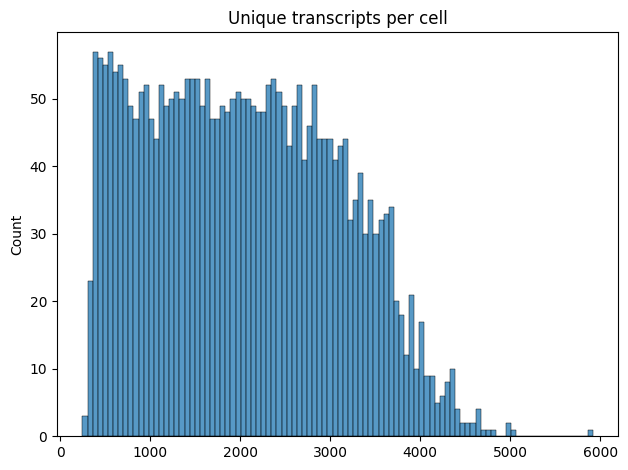

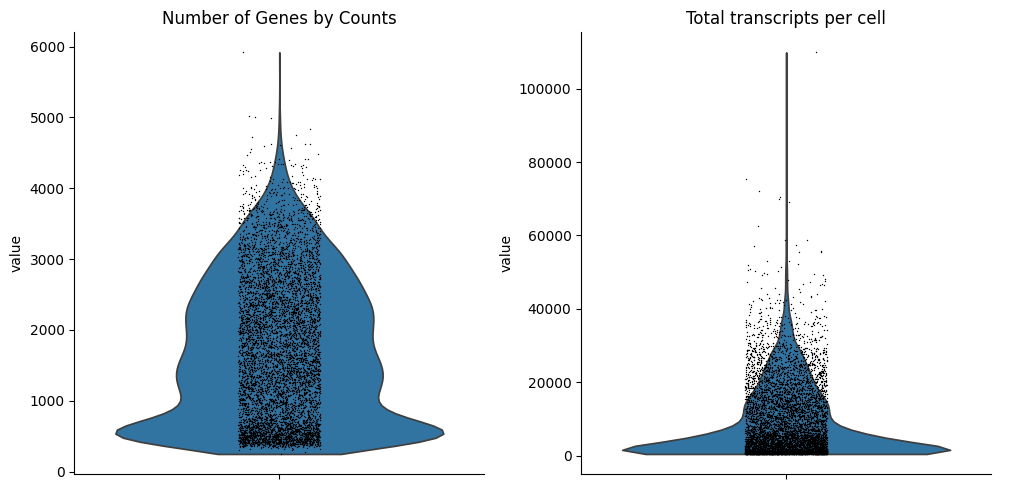

In [ ]:
data = sc.read("../0_data/malpighian_tubule.tsv")

data = data.transpose() #need to transpose it to get it in the right way scanpy expects (cell, genes)

print(f"Number of cells: {data.n_obs}")
print(f"Number of genes: {data.n_vars}")

sc.pp.calculate_qc_metrics(data, inplace=True)
plot_qc_metrics(data)

Number of cells after filtering: 6268
Number of genes after filtering: 7959


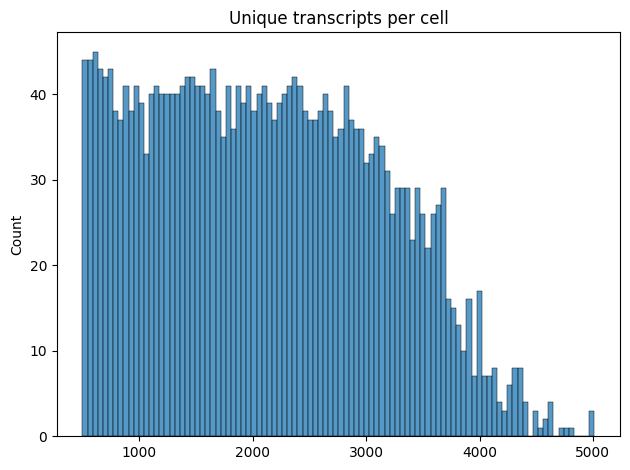

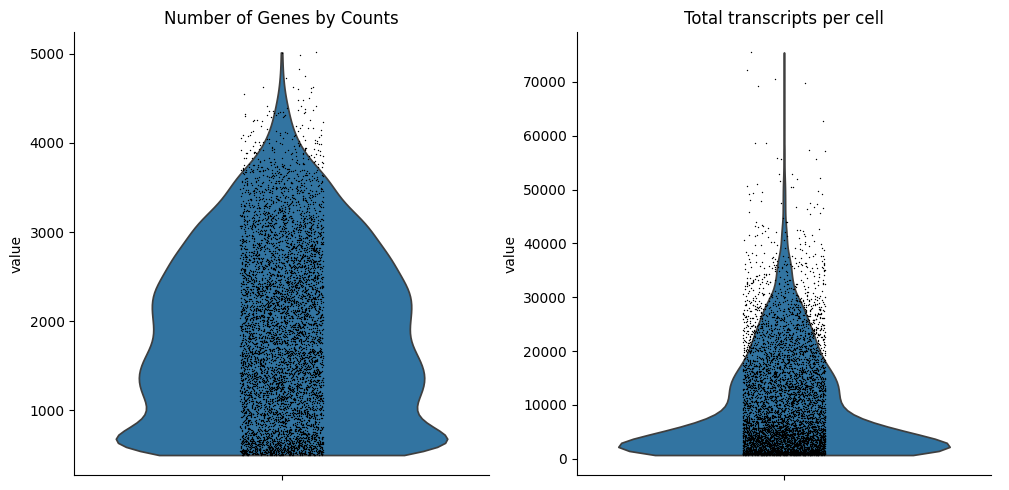

In [ ]:
sc.pp.filter_cells(data, min_genes=500)  #filter out cells with fewer than 500 genes
sc.pp.filter_genes(data, min_cells=100)  #filter out genes expressed in fewer than 100 cells

data = data[data.obs["n_genes_by_counts"] <= 5500].copy() #removing an outlier

print(f"Number of cells after filtering: {data.n_obs}")
print(f"Number of genes after filtering: {data.n_vars}")

sc.pp.normalize_total(data.copy(), target_sum=1e6) #normalize in cpm
sc.pp.log1p(data) #log normalize

plot_qc_metrics(data) #We have one group of cell with high number of genes, look at where these cells are on the PCA to see if this is an artifact or not, are these just one custer

data.write('../1_preprocessing/preprocessed_data.h5ad')